In [15]:
import psycopg2
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT

#criar banco de dados
con = psycopg2.connect(host='localhost', database='imobiliaria', user='postgres', password='mimoso')
con.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)
cursor = con.cursor()
name_database = "imobiliaria"
sql_create_database = "CREATE DATABASE {}".format(name_database)
try:
    cursor.execute(sql_create_database)
except:
    print("database already exists")

database already exists


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5001/ (Press CTRL+C to quit)


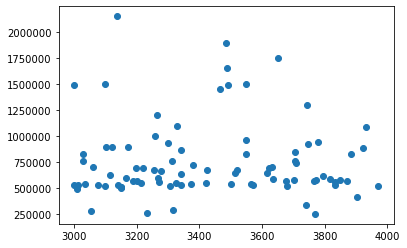

127.0.0.1 - - [10/Feb/2020 17:28:13] "GET /area/3000/4000 HTTP/1.1" 200 -
127.0.0.1 - - [10/Feb/2020 17:28:29] "GET /maiorpreco HTTP/1.1" 404 -


In [16]:
from flask import Flask, request
import pandas as pd
import matplotlib.pyplot as plt

app = Flask(__name__)

@app.route("/area/<area_min>/<area_max>", methods=['GET'])
def area(area_min, area_max):

    query = "SELECT * FROM info_casas WHERE area BETWEEN {area_min} AND {area_max}".format(area_min=area_min, area_max=area_max)

    try:
        df = pd.read_sql(query, con)
        
        plt.scatter(df['area'], df['preco'])
        plt.show()
      
        return df.to_json(orient='records'), 200
    except:
        return "Não foi possível fazer SELECT na tabela.", 500

app.run(port=5001)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5001/ (Press CTRL+C to quit)


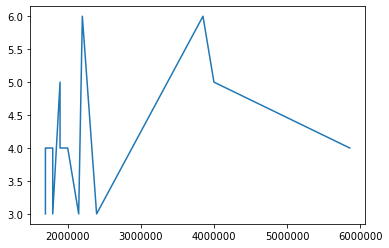

127.0.0.1 - - [10/Feb/2020 17:28:47] "GET /maiorpreco HTTP/1.1" 200 -


In [17]:
@app.route("/maiorpreco", methods=['GET'])
def maiorpreco():

    query = "SELECT * FROM info_casas ORDER BY preco DESC LIMIT 15"

    try:
        df = pd.read_sql(query, con)
        
        plt.plot(df['preco'], df['qte_quartos'])
        plt.show()
      
        return df.to_json(orient='records'), 200
    except:
        return "Não foi possível fazer SELECT na tabela.", 500

app.run(port=5001)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5001/ (Press CTRL+C to quit)


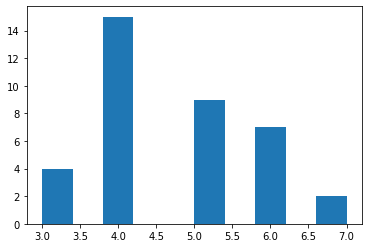

127.0.0.1 - - [10/Feb/2020 17:29:13] "GET /banheiros/4 HTTP/1.1" 200 -


In [18]:
@app.route("/banheiros/<qtd_ban>", methods=['GET'])
def banheiros(qtd_ban):

    query = "SELECT * FROM info_casas WHERE qte_banheiros = {qtd_ban}".format(qtd_ban=qtd_ban)

    try:
        df = pd.read_sql(query, con)
        
        plt.hist(df['qte_quartos'])
        plt.show()
        
        return df.to_json(orient='records'), 200
    except:
        return "Não foi possível fazer SELECT na tabela.", 500

app.run(port=5001)

In [26]:
@app.route("/atualizar_cep", methods=['PUT'])
def atualizar_cep():
    post_args = request.json
    if "cep" not in post_args:
        return "O cep não foi informado no dado recebido.", 400
    
    if "qte_quartos" in post_args:
        query = "UPDATE info_casas SET qte_quartos = {qte_quartos} WHERE cep = {cep}".format(qte_quartos=post_args["qte_quartos"], cep=post_args["cep"])
        cursor.execute(query)
    if "qte_banheiros" in post_args:
        query = "UPDATE info_casas SET qte_banheiros = {qte_banheiros} WHERE cep = {cep}".format(qte_banheiros=post_args["qte_banheiros"], cep=post_args["cep"])
        cursor.execute(query)
    if "area" in post_args:
        query = "UPDATE info_casas SET area = {area} WHERE cep = {cep}".format(area=post_args["area"], cep=post_args["cep"])
        cursor.execute(query)
    if "preco" in post_args:
        query = "UPDATE info_casas SET preco = {preco} WHERE cep = {cep}".format(preco=post_args["preco"], cep=post_args["cep"])
        cursor.execute(query)
    con.commit()
    return "Registro atualizado com sucesso!", 200

app.run(port=5001)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5001/ (Press CTRL+C to quit)
127.0.0.1 - - [10/Feb/2020 17:33:17] "PUT /atualizar_cep HTTP/1.1" 200 -


In [27]:
@app.route("/deletar", methods=['DELETE'])
def deletar():
    post_args = request.json
    if "cep" not in post_args:
        return "O cep não foi informado.", 400
    
    query = "DELETE FROM info_casas WHERE cep = {cep};".format(cep=post_args["cep"])
    cursor.execute(query)
    con.commit()
    return "Registro deletado com sucesso!", 200

app.run(port=5001)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5001/ (Press CTRL+C to quit)
127.0.0.1 - - [10/Feb/2020 17:33:50] "DELETE /deletar HTTP/1.1" 200 -
